In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import polars as pl

## Load file

In [4]:
path = '/gdrive/MyDrive/Nhóm 1/2 Bài tập trên lớp/Thực hành Final/Data processed/teacher_translated.json'
df = pd.read_json(path, lines=True)
df.head()

,id,name,name_en,about,job_title,org_name
0,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university
1,T_2,陈怡,Yi Chen,"born in chongqing in 1945, he graduated from h...",professor,tsinghua university
2,T_3,程钢,Gang Cheng,"cheng gang is the course leader of ""introducti...",associate professor,tsinghua university
3,T_4,谢维和,xie wei he,"xie weihe, phd, professor, doctoral supervisor...",professor,tsinghua university
4,T_5,史静寰,Jing-huan Shi,"shi jinghuan, female, professor and doctoral s...",professor,tsinghua university


## 1.Khám phá dữ liệu

### 1.1 Thống kê mô tả

In [ ]:
df.columns

Index(['id', 'name', 'name_en', 'about', 'job_title', 'org_name'], dtype='object')

In [ ]:
df.shape

(9876, 6)

In [ ]:
df.describe()

,id,name,name_en,about,job_title,org_name
count,9876,9876,9876,9876,9876,9876
unique,9876,9060,9162,9402,610,725
top,T_1,张伟,wang jing,,associate professor,tsinghua university
freq,1,9,7,363,2983,678


In [ ]:
df['id'].value_counts()

,count
id,
T_1,1
T_8083,1
T_8037,1
T_8041,1
T_8042,1
...,...
T_3483,1
T_3484,1
T_3485,1


In [ ]:
df['name'].value_counts()

,count
name,
张伟,9
王磊,9
张莉,7
王颖,7
刘芳,7
...,...
John Tsitsiklis,1
清华大学教务处,1
郝振平,1


In [ ]:
df['name_en'].value_counts()

,count
name_en,
wang jing,7
Yan Li,7
Wei Zhang,7
wang wei,7
li yan,7
...,...
Jiahong Li,1
Jin Ben,1
Fang Yan,1


In [ ]:
df['job_title'].value_counts()

,count
job_title,
associate professor,2983
professor,2205
lecturer,2123
,659
teaching assistant,218
...,...
"distinguished professor, department of computer science and technology, tsinghua university",1
chief product director of puliang cloud,1
technical director of puliang cloud quantitative system,1


In [ ]:
df['about'].value_counts()

,count
about,
,363
none,15
"excellent teacher, popular among students",8
/,8
"doctoral degree, associate professor, currently working in the pathophysiology teaching and research section of guizhou medical university, engaged in teaching and scientific research",4
...,...
"pete mumby is an arc laureate and a marine scientist specializing in spatial ecological theory. professor mumby leads the marine spatial ecology laboratory (msel), which supports the implementation of applied science in coral reef management. his work includes basic coral reef ecology, remote sensing, ecological modeling, and algorithm design for marine spatial planning that takes into account larval and ontogenetic connectivity, climate change, and local natural conditions.",1
"hugh possingham is director of the arc center of excellence for environmental decision making. his research involves the use of mathematical and statistical tools to solve problems in ecology and environmental conservation. laboratory members range from empirical ecologists to mathematicians. recent research results include the creation of software (marxan) for rezoning protected areas on australia's great barrier reef. marxan is now used in more than 100 countries around the world to design their own marine protected area systems to minimize the impact of land use changes on coastal ecosystems, and to set global priority conservation optimization monitoring and decision support protocols.",1
"stuart phinn's research interests lie in measuring and monitoring environmental change using earth observation data and published/shared ecosystem data. he received his phd from the university of california, santa barbara/san diego state university in 1997. his main research work focuses on using satellite and aircraft imaging, combined with field measurements, to map and monitor the earth's environment and how it changes over time. this work is done in collaboration with other environmental scientists, government environmental regulatory agencies, non-governmental agencies, and private industry. an increasing part of the work is now focused on national collaboration of earth observation activities, and the collection, publication and sharing of ecosystem data.",1


In [ ]:
df['org_name'].value_counts()

,count
org_name,
tsinghua university,678
xi'an jiaotong university,375
shandong university,173
shaanxi industrial vocational and technical college,153
beijing normal university,149
...,...
fujian agriculture and forestry university jinshan college,1
beijing arts and crafts advanced technical school,1
beijing normal university school of continuing education,1


In [ ]:
# Tìm các giá trị null
null_values = df.isnull().sum()

# Tính tổng số giá trị
true_values = df.count().sort_values(ascending=True)

# Tính phần trăm giá trị null
wrong_value_percentage = null_values / len(df) * 100

# Chuyển đổi thành dataframe của các giá trị thiếu
missing_values_df = pd.concat({'True values': true_values, 'Null values': null_values, 'Missing percentage': wrong_value_percentage}, axis=1)

# Hiển thị các giá trị thiếu
missing_values_df

,True values,Null values,Missing percentage
id,9876,0,0.0
name,9876,0,0.0
name_en,9876,0,0.0
about,9876,0,0.0
job_title,9876,0,0.0
org_name,9876,0,0.0


In [ ]:
# Tính tỷ lệ phần trăm giá trị thiếu cho mỗi cột
error_rate = (missing_values_df['Null values'].sum() / len(df) / len(df.columns)) * 100
print(f'Tỷ lệ dữ liệu thiếu trong data là {round(error_rate, 2)} %')

Tỷ lệ dữ liệu thiếu trong data là 0.0 %


## Nhận xét:
* File dữ liệu gồm có 9876 hàng và 6 cột.
* Các cột đều có giá trị trùng lặp, chỉ có cột id không có giá trị trùng lặp nên bảng dữ liệu này không bị trùng lặp.
* Các giá trị của các cột cũng nhất quán và không bị nhiễu.
* Bộ dữ liệu không có giá trị Null ở các cột.

### 1.2 Trực quan hóa dữ liệu

### Biểu đồ cho cột job_title (chỉ lấy 20 giá trị có số lượng count nhiều nhất)

In [11]:
df_attempts = df['job_title'].value_counts()
df_attempts = df_attempts.reset_index()
df_attempts.columns = ['job_title', 'count']
df_attempts

,job_title,count
0,associate professor,2983
1,professor,2205
2,lecturer,2123
3,,659
4,teaching assistant,218
...,...,...
605,"distinguished professor, department of compute...",1
606,chief product director of puliang cloud,1
607,technical director of puliang cloud quantitati...,1
608,chief technology officer of puliang cloud,1


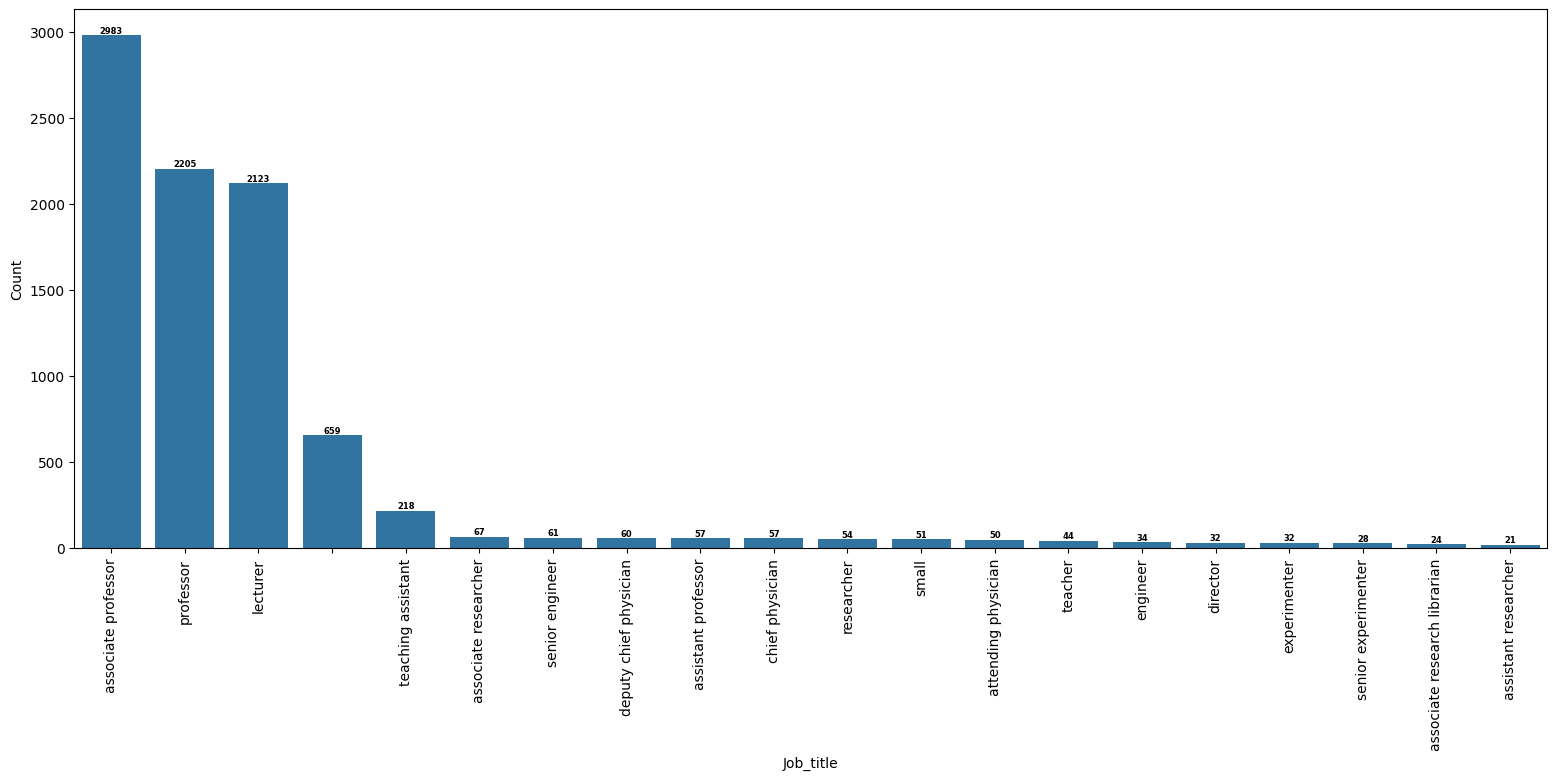

In [13]:
# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='job_title', y='count', data=df_attempts[:20])
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.xlabel('Job_title')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


### Nhận xét:
* Số lượng chiếm nhiều nhất lần lượt là associate professor, professor và lecturer.
* Số lượng những giáo viên không có job_title khá lớn (659 người).
* Những job_title còn lại số lượng không đáng kể.

### Biểu đồ cho cột org_name (chỉ lấy 20 giá trị có số lượng count nhiều nhất)

In [14]:
df_attempts = df['org_name'].value_counts()
df_attempts = df_attempts.reset_index()
df_attempts.columns = ['org_name', 'count']
df_attempts

,org_name,count
0,tsinghua university,678
1,xi'an jiaotong university,375
2,shandong university,173
3,shaanxi industrial vocational and technical co...,153
4,beijing normal university,149
...,...,...
720,fujian agriculture and forestry university jin...,1
721,beijing arts and crafts advanced technical school,1
722,beijing normal university school of continuing...,1
723,rwth aachen university,1


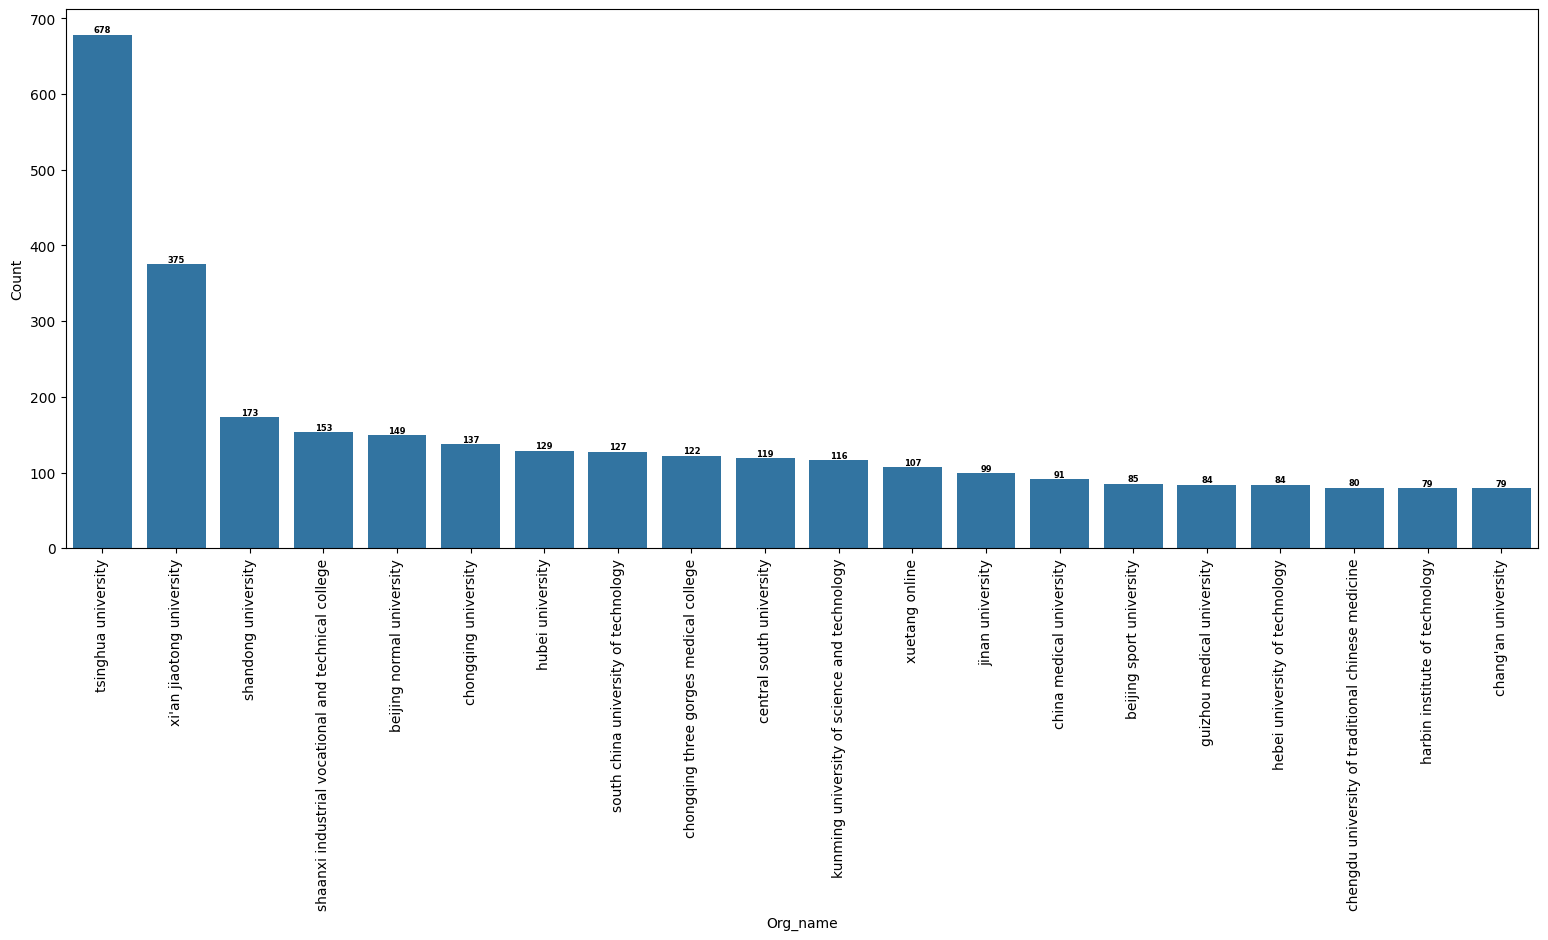

In [15]:
# Vẽ biểu đồ cột
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='org_name', y='count', data=df_attempts[:20])
# Thêm chú thích là số giá trị trên đầu mỗi cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Vị trí x giữa cột
        p.get_height() + 0.5,           # Vị trí y trên cột
        f'{int(p.get_height())}',      # Văn bản chú thích (làm tròn thành số nguyên)
        ha='center',                   # Căn chỉnh ngang
        va='bottom',                   # Căn chỉnh dọc
        fontweight='bold',             # Độ đậm
        fontsize = 6
    )
plt.xlabel('Org_name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


### Nhận xét:
* Hai trường có số lượng giáo viên làm việc nhiều nhất là tsinghua university, xi'an jiaotong university.
* Các trường còn lại số lượng không đáng kể, gần như bằng nhau.

## 2. Làm sạch dữ liệu (dữ liệu không bị thiếu, không trùng lặp, không nhiễu và nhất quán nên sẽ không xử lý làm sạch dữ liệu).

## 3. Chuyển đổi dữ liệu

### Tạo biến mới

#### Load file ranking of unversities in github

In [16]:
df_ranking = pd.read_csv('uni_02.csv', encoding='utf-16')
df_ranking.head()

,rank,name,number_students,student_staff_ratio,intl_students,female_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score,address,street_address,locality_address,region_address,postcode_address,country_address
0,1,University of Oxford,20664,11.2,41.0,46.0,95.4,90.5,99.6,98.4,65.5,96.4,"University Offices, Wellington Square, Oxford,...",University Offices Wellington Square,Oxford,Oxfordshire,OX1 2JD,United Kingdom
1,2,California Institute of Technology,2240,6.4,30.0,34.0,94.5,92.1,97.2,97.9,88.0,82.5,"1200 East California Boulevard, Pasadena, Cali...",1200 East California Boulevard,Pasadena,CA,91125,United States
2,3,University of Cambridge,18978,10.9,37.0,47.0,94.4,91.4,98.7,95.8,59.3,95.0,"The Old Schools, Trinity Lane, Cambridge, Camb...",The Old Schools Trinity Lane,Cambridge,Cambridgeshire,CB2 1TN,United Kingdom
3,4,Stanford University,16135,7.3,23.0,43.0,94.3,92.8,96.4,99.9,66.2,79.5,"450 Serra Mall, Stanford, California, 94305–20...",450 Serra Mall,Stanford,CA,94305–2004,United States
4,5,Massachusetts Institute of Technology,11247,8.6,34.0,39.0,93.6,90.5,92.4,99.5,86.9,89.0,"77 Massachusetts Avenue, Cambridge, Massachuse...",77 Massachusetts Avenue,Cambridge,MA,02139-4307,United States


#### Merge two file based on name of universities

In [17]:
df['org_name_lower'] = df['org_name'].str.lower()
df_ranking['name_lower'] = df_ranking['name'].str.lower()

# Merge hai DataFrame
df = df.merge(df_ranking[['name_lower', 'rank']], left_on='org_name_lower', right_on='name_lower', how='left')

# Loại bỏ các cột không cần thiết
df.drop(columns=['org_name_lower', 'name_lower'], inplace=True)

df.head()

,id,name,name_en,about,job_title,org_name,rank
0,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university,23
1,T_2,陈怡,Yi Chen,"born in chongqing in 1945, he graduated from h...",professor,tsinghua university,23
2,T_3,程钢,Gang Cheng,"cheng gang is the course leader of ""introducti...",associate professor,tsinghua university,23
3,T_4,谢维和,xie wei he,"xie weihe, phd, professor, doctoral supervisor...",professor,tsinghua university,23
4,T_5,史静寰,Jing-huan Shi,"shi jinghuan, female, professor and doctoral s...",professor,tsinghua university,23


#### Drop the rows without rank

In [18]:
df.dropna(subset=['rank'], inplace=True)

#### Load file course-teacher

In [19]:
course_teacher = pd.read_csv("course-teacher.txt", sep='\t', header=None, names=['course_id', 'id'])
course_teacher.head()

,course_id,id
0,C_323899,T_5092
1,C_323899,T_5092
2,C_324384,T_6164
3,C_324384,T_6472
4,C_324384,T_6471


#### Merge two files based on id

In [20]:
joined_df = pd.merge(df, course_teacher, left_on='id', right_on='id', how='inner')
joined_df.head()

,id,name,name_en,about,job_title,org_name,rank,course_id
0,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university,23,C_375629
1,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university,23,C_425434
2,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university,23,C_445639
3,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university,23,C_445639
4,T_1,刘燕妮,Yanni Liu,graduated from the philosophy department of pe...,lecturer,tsinghua university,23,C_676649


In [21]:
joined_df.drop(columns=['id', 'name', 'name_en', 'about', 'job_title', 'org_name'], inplace=True)
joined_df.head()

,rank,course_id
0,23,C_375629
1,23,C_425434
2,23,C_445639
3,23,C_445639
4,23,C_676649


In [22]:
cols = list(joined_df.columns)
idx_course_id = cols.index('course_id')
idx_rank = cols.index('rank')
cols[idx_course_id], cols[idx_rank] = cols[idx_rank], cols[idx_course_id]
joined_df = joined_df[cols]

joined_df.head()

,course_id,rank
0,C_375629,23
1,C_425434,23
2,C_445639,23
3,C_445639,23
4,C_676649,23
